In [ ]:
## Fitting with GPFlow

Here's a simple example of GPflow fitting data.

╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │       value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 3.96762     │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.690491    │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ 

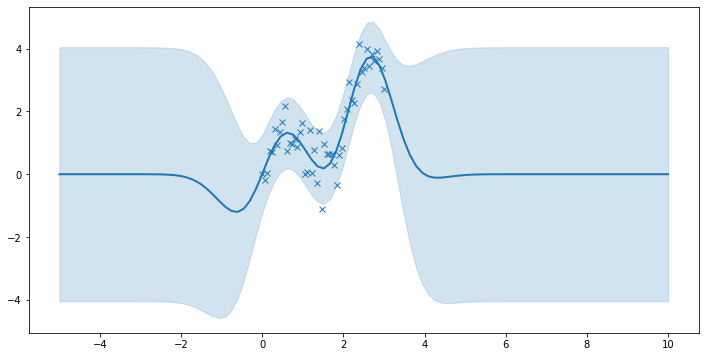

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow
from gpflow.utilities import print_summary, set_trainable

def f(x):
    return np.sin(3*x) + x

xtrain = np.linspace(0, 3, 50).reshape([-1, 1])
ytrain = f(xtrain) + 0.5*(np.random.randn(len(xtrain)).reshape([-1, 1]) - 0.5)

ymean = np.mean(ytrain)
shift = gpflow.kernels.Constant()
shift.variance.assign(ymean**2)

rbf = gpflow.kernels.SquaredExponential()
rbf.lengthscales.assign(3.0*(np.max(xtrain) - np.min(xtrain))/len(xtrain))  # Guess not too broad, not too fine
rbf.variance.assign(3.0*np.var(ytrain))                                     # Guess from existing data range

# Alternative: if you want "real prior" data range
#rbf.variance.assign(10.0*((ytrain.max() - ytrain.min()))**2)  # Set broad or manually
#set_trainable(rbf.variance, False)  # 

k = rbf + shift
m = gpflow.models.GPR(data=(xtrain, ytrain), kernel=k)


opt = gpflow.optimizers.Scipy()

def objective_closure():
    return -m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100))

print_summary(m)


xpl = np.linspace(-5, 10, 100).reshape(100, 1)
mean, var = m.predict_y(xpl)

plt.figure(figsize=(12, 6))
plt.plot(xtrain, ytrain, 'x')
plt.plot(xpl, mean, 'C0', lw=2)
plt.fill_between(xpl[:, 0],
                 mean[:, 0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:, 0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

In [6]:
# The same with proFit
import profit

fit = profit.fit(xtrain, ytrain)

TypeError: ('Unknown keyword argument:', 'lengthscale')